#**Smoking Detection**#
Detect smoking using yolo v8




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as imd
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Downloading datset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wAFpXIOS5YhwXaos60c3")
project = rf.workspace("ahmad-essam-gvgib").project("smooking-detection")
version = project.version(4)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Smooking-Detection-4 in yolov8:: 100%|██████████| 10731/10731 [00:01<00:00, 6695.81it/s]


In [5]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 21.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
dataset.location

'/content/Smooking-Detection-4'

#**Visualize Data**#

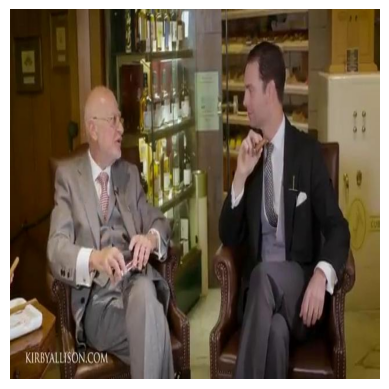

In [7]:
import os
url = '/content/Smooking-Detection-4/train/images'
data = os.listdir(url)

for i,j in enumerate(data):
  image = imd.imread(f'{url}/{j}')
  plt.imshow(image)
  plt.axis('off')
  plt.show()
  break

#**Train Yolo model**#

In [8]:
!yolo task=detect mode=train epochs=50 batch=16 plots=True model='yolov8n.pt' data={dataset.location}/data.yaml imgsz=640

100% 6.25M/6.25M [00:00<00:00, 113MB/s]
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Smooking-Detection-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

In [11]:
import shutil


source_folder = '/content/runs'
destination_folder = '/content/drive/MyDrive/smoking'

# Move the folder
shutil.move(source_folder, destination_folder)

print("Folder moved successfully!")


Folder moved successfully!


In [9]:
!pip install --upgrade onnxruntime-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.4 MB/s eta 0:00:00


In [10]:
from ultralytics import YOLO

model = YOLO("/content/runs/detect/train/weights/best.pt")

model.export(format="onnx")  # This creates 'best.onnx'


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 166.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 338.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 200.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 13.4s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.36...
ONNX: export success ✅ 14.8s, saved as '/content/ru

'/content/runs/detect/train/weights/best.onnx'

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import os
# os.mkdir('/content/drive/MyDrive/smoking')

In [12]:
os.chdir('/content/drive/MyDrive/smoking/runs/detect/train/weights')

In [14]:
os.chdir('../')

In [15]:
ls

args.yaml                                           R_curve.png           val_batch0_labels.jpg
confusion_matrix_normalized.png                     results.csv           val_batch0_pred.jpg
confusion_matrix.png                                results.png           val_batch1_labels.jpg
events.out.tfevents.1730824018.ca51a260aadd.1771.0  train_batch0.jpg      val_batch1_pred.jpg
F1_curve.png                                        train_batch12680.jpg  val_batch2_labels.jpg
labels_correlogram.jpg                              train_batch12681.jpg  val_batch2_pred.jpg
labels.jpg                                          train_batch12682.jpg  weights/
P_curve.png                                         train_batch1.jpg
PR_curve.png                                        train_batch2.jpg


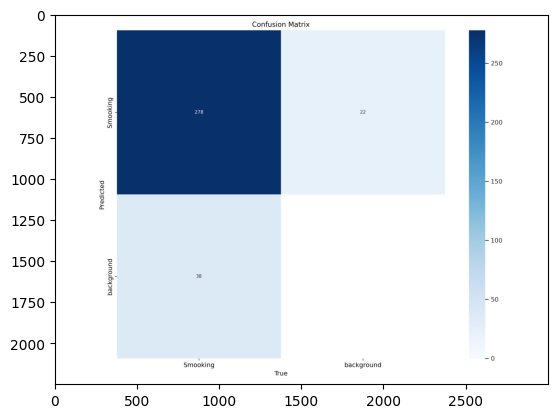

In [16]:
plt.imshow(imd.imread('confusion_matrix.png'))